# Visão Computacional - Lista 3

Aqui serão resolvidas as atividades da terceira lista de Visão Computacional pelo aluno Sillas Rocha da Costa, começaremos realizando alguns imports:

In [1]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import numpy as np

# Exercício 1 - Alterando Brilho e Contraste

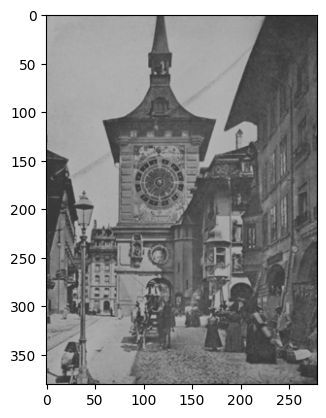

In [2]:
img1 = cv.imread("./PoucoContraste.png")
img1 = img1[::,::-1]

plt.imshow(img1)

In [3]:
def change_img(img:np.ndarray, brilho:float=0, contraste:float=1) -> np.ndarray:
    # Normaliza a imagem para o intervalo [0, 1]
    if np.max(img) > 1:
        img = img / 255
    # Aplica o brilho
    img = img + brilho

    r_mean = np.mean(img[:,:,0])
    g_mean = np.mean(img[:,:,1])
    b_mean = np.mean(img[:,:,2])
    # Aplica o contraste
    img[:,:,0] = contraste * (img[:,:,0] - r_mean) + r_mean
    img[:,:,1] = contraste * (img[:,:,1] - g_mean) + g_mean
    img[:,:,2] = contraste * (img[:,:,2] - b_mean) + b_mean
    # Corta os valores menores que 0 e maiores que 1 para 0 e 1
    img = np.clip(img, 0, 1)

    return img

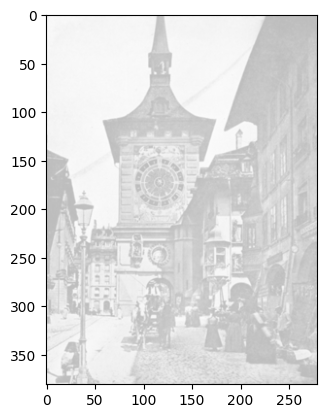

In [4]:
img2 = change_img(img1, 0.4, 0.5)
plt.imshow(img2)

# Exercício 2 - Histograma

In [5]:
def get_list_values(img:np.ndarray, brilho:float=0, contraste:float=1) -> np.ndarray:
    # Funciona para imagens em preto e branco, alterando o brilho e contraste se requisitado
    img = change_img(img=img, brilho=brilho, contraste=contraste)
    part_img = img[:,:,0]
    lines, cols = img.shape[:2]
    valores = list()
    # Faz uma lista com cada um dos valores dos pixels
    for line in range(lines):
        for col in range(cols):
            valores.append(part_img[line, col])

    return np.array(valores)

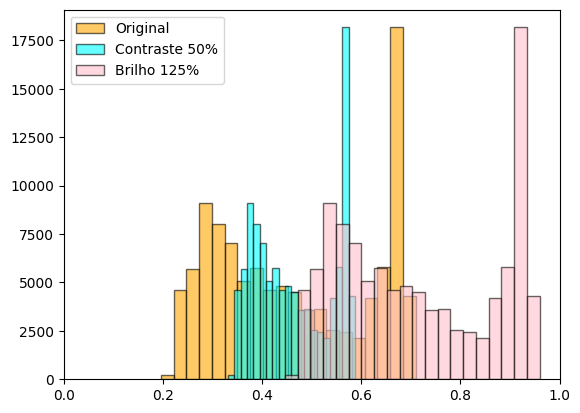

In [6]:
valores_ori = get_list_values(img1)
valores_bri = get_list_values(img1, brilho=0.25)
valores_con = get_list_values(img1, contraste=0.5)

plt.hist(valores_ori, bins=20, color="orange", edgecolor="black", alpha=0.6, label="Original")
plt.hist(valores_con, bins=20, color="cyan", edgecolor="black", alpha=0.6, label="Contraste 50%")
plt.hist(valores_bri, bins=20, color="pink", edgecolor="black", alpha=0.6, label="Brilho 125%")

plt.legend()
plt.xlim(0, 1)

plt.show()

# Exercício 3 - Filtros

In [7]:
def filtro(img:np.ndarray, filtro:np.ndarray) -> np.ndarray:
    # Esta função corta as bordas da imagem ao depender das dimensões do filtro para preto.

    lines, cols = img.shape[:2]
    lin_filtro, col_filtro = filtro.shape
    # Normaliza o filtro com a norma de forbenius
    filtro = filtro / np.sum(np.sqrt(np.power(filtro, 2)))
    
    # Calcula o deslocamento necessário para o filtro
    range_lin = int((lin_filtro - 1)/2)
    range_col = int((col_filtro - 1)/2)

    imagem_filtrada = np.zeros_like(img)
    # Aplica o filtro em cada pixel da imagem, por cor
    for dim in range(3):
        img_dim = img[:,:,dim]
        imagem_filtrada_dim = np.zeros((lines, cols))
        
        for lin in range(range_lin, lines - range_lin):
            for col in range(range_col, cols - range_col):
                
                l = (lin - range_lin, lin + range_lin + 1)
                c = (col - range_col, col + range_col + 1)

                value = np.sum(img_dim[l[0]:l[1], c[0]:c[1]] * filtro)
                imagem_filtrada_dim[lin, col] = value
    
        imagem_filtrada[:,:,dim] = imagem_filtrada_dim

    return imagem_filtrada

In [8]:
chess = cv.imread("./Chess_Board.svg.png")
chess = chess[::,::-1]

#### a) Constante 3x3

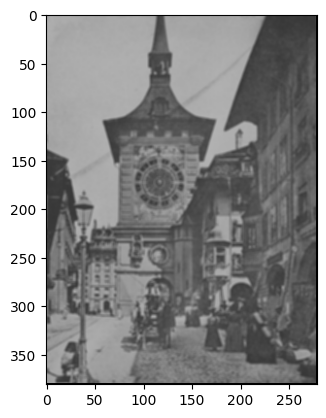

In [9]:
mat = np.ones((3,3))

img_a = filtro(img1, mat)
plt.imshow(img_a)

#### b) Derivadas

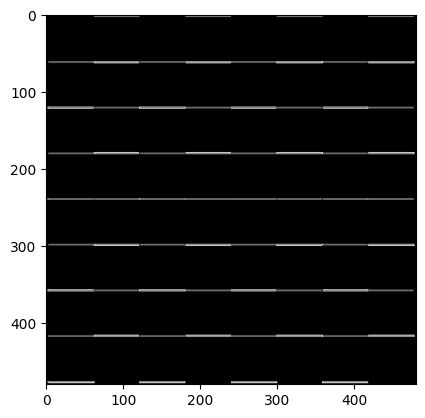

In [10]:
vertical = np.array([-1, 0, 1]).reshape(-1, 1)

img_v = filtro(chess, vertical)
plt.imshow(img_v)

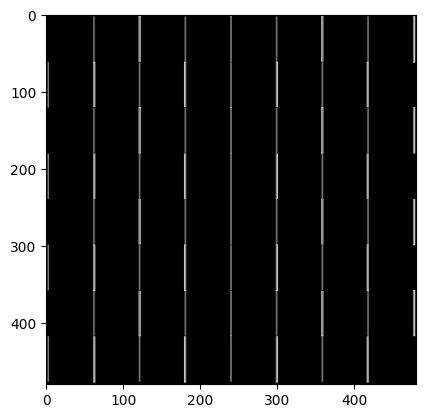

In [11]:
horizontal = vertical.T

img_h = filtro(chess, horizontal)
plt.imshow(img_h)

#### c) Sobel

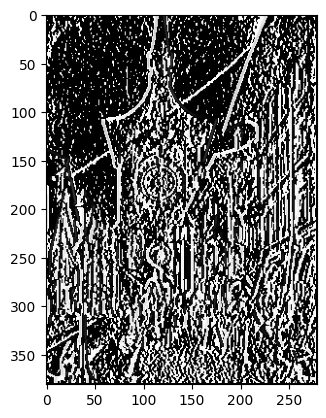

In [12]:
sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

img_sv = filtro(img1, sobel)
plt.imshow(img_sv)

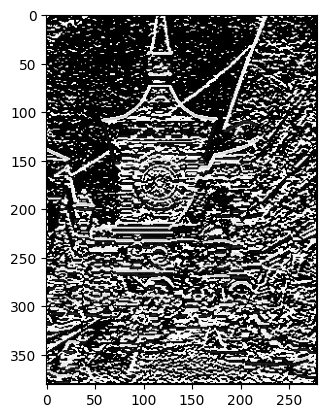

In [13]:
img_sh = filtro(img1, sobel.T)
plt.imshow(img_sh)

#### d) Gaussiana

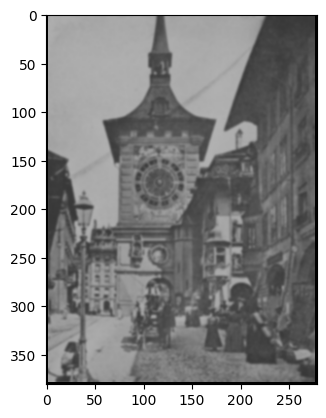

In [14]:
gaussiana = np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1],
])


img_g = filtro(img1, gaussiana)
plt.imshow(img_g)

# Exercício 4 - Redução de dimensão

In [15]:
def reducao_corte(img:np.ndarray) -> np.ndarray:
    # Corta as linhas e colunas pares da imagem
    img = img[::2,::2]

    return img

def reducao_suave(img:np.ndarray, suavizacao:np.ndarray=0) -> np.ndarray:
    if suavizacao == 0:
        img = cv.GaussianBlur(img, (5, 5), 0)
    else:
        img = filtro(img, suavizacao)

    # Corta as linhas e colunas pares da imagem após suavizar
    img = img[::2, ::2]

    return img

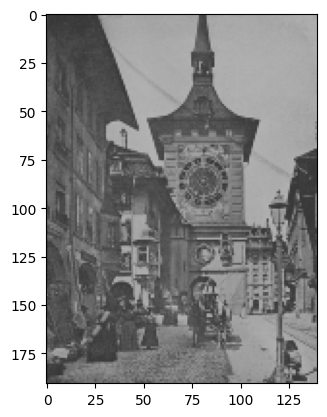

In [16]:
img4 = cv.imread("./PoucoContraste.png")
img4_2 = reducao_corte(img4)
plt.imshow(img4_2)

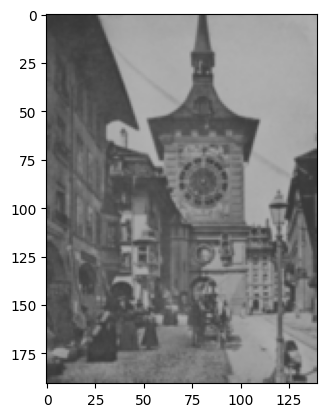

In [17]:
img4_s = reducao_suave(img4)
plt.imshow(img4_s)

# Exercício 5.1 - Too much noise

In [18]:
def ruido_gaussian(img:np.ndarray, loc:float=0, std:float=1) -> np.ndarray:
    if np.max(img) > 1:
        img = img / 255
    # Calcula um ruido do tamanho da imagem após ela ter sido normalizada
    ruido = np.random.normal(loc=loc, scale=std, size=img.shape)
    # Aplica o ruido
    img = img + ruido
    # Trunca os valores para o intervalo [0, 1]
    img = np.clip(img, 0, 1)

    return img

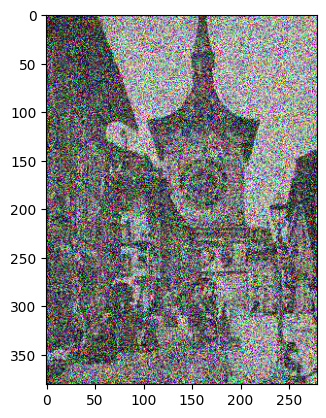

In [19]:
img_ruido = ruido_gaussian(img4, 0, 0.3)
plt.imshow(img_ruido)

In [20]:
def filtro_kuwahara(img:np.ndarray, around:int=3) -> np.ndarray:
    lins, cols = img.shape[:2]
    # Copia as bordas da imagem pro tamanho selecionado do filtro
    img_rep = cv.copyMakeBorder(img, around, around, around, around, cv.BORDER_REPLICATE)

    for layer in range(3):
        img_layer = img_rep[:,:,layer]

        for lin in range(around, lins+around):
            for col in range(around, cols+around):
                # Recorta as regiões desejadas.
                regions = [
                img_layer[lin-around:lin+1, col-around:col+1],
                img_layer[lin-around:lin+1, col:col+around+1],
                img_layer[lin:lin+around+1, col-around:col+1],
                img_layer[lin:lin+around+1, col:col+around+1]
                ]
                # Calcula o std para cada região em volta e o atribui a uma média
                stds = dict()
                for z in range(4):
                    stds[np.std(regions[z])] = np.mean(regions[z])
                # Seleciona a média com menor std para ser o novo valor do pixel
                img[lin-around, col-around, layer] = stds[min(stds.keys())]

    return img

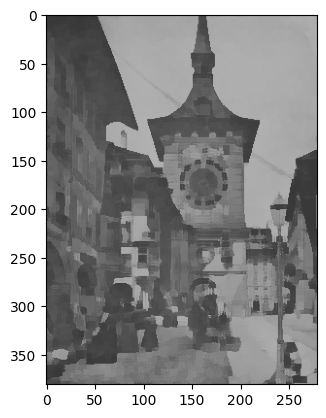

In [21]:
img_kuw = filtro_kuwahara(img4)
plt.imshow(img_kuw)

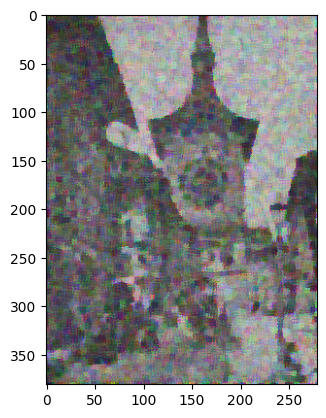

In [22]:
img_kuw2 = filtro_kuwahara(img_ruido)
plt.imshow(img_kuw2)